In [16]:
number_characters_to_consider = [2,3,5,8,10,12,15]

b = pd.read_csv('Naive_Bayes.csv')

(0.5, 0.75)

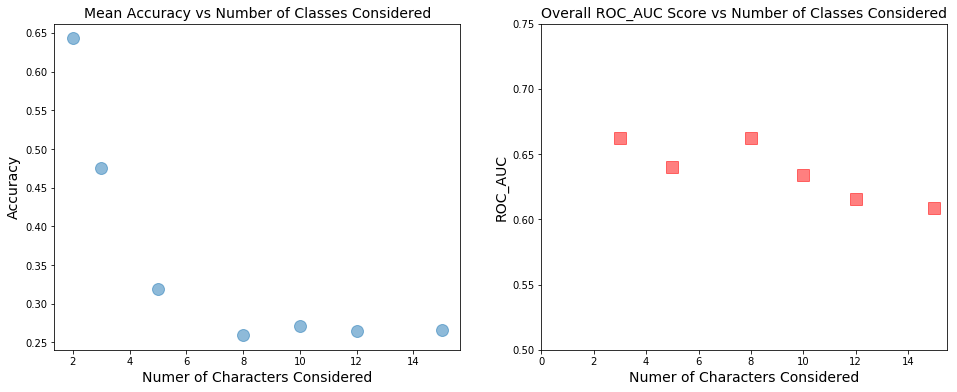

In [17]:
# Compare modeling results before and after applying sampling techniques 
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)


plt.plot(number_characters_to_consider,b['Naive_Bayes Acc'],marker = 'o' , markersize =12, linestyle = 'none', label = 'Naive Bayes with imbalanced data',alpha =0.5)
plt.xlabel('Numer of Characters Considered',FontSize=14)
plt.ylabel('Accuracy',FontSize=14)

plt.title('Mean Accuracy vs Number of Classes Considered',FontSize=14)

plt.subplot(1, 2, 2)
plt.plot(number_characters_to_consider[1:], b['Naive_Bayes ROC'][1:],marker = 's', color = 'r',markersize =12, linestyle = 'none', label = 'imbalanced data',alpha =0.5)
plt.title('Overall ROC_AUC Score vs Number of Classes Considered',FontSize=14)
plt.xlabel('Numer of Characters Considered',FontSize=14)
plt.ylabel('ROC_AUC',FontSize=14)
plt.xlim([0,15.5])
plt.ylim([0.5,0.75])

# Model Accuracy for Different Number of Classes

In [ ]:
d = pd.read_csv('Sampling_NN_Results.csv')

In [ ]:
# Compare modeling results before and after applying sampling techniques 
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)


plt.plot(number_characters_to_consider,b['Naive_Bayes Acc'],marker = 'o', markersize =12, linestyle = 'none', label = 'Naive Bayes with Imabalanced Data ')

plt.plot(number_characters_to_consider,d['Neural_Network_ACC'],marker = 'd', markersize =12, linestyle = 'none', label = 'Deep_Learning Keras with Imbalanced Data')
plt.xlabel('Number of Characters Considered')
plt.ylabel('Accuracy')
plt.legend(loc ='upper right')
plt.title('Mean Accuracy vs Number of Classes Considered')

plt.subplot(1, 2, 2)
plt.plot(number_characters_to_consider[1:], b['Naive_Bayes ROC'][1:],marker = 'o', markersize =12, linestyle = 'none',  label = 'Naive Bayes with imbalanced data')
plt.plot(number_characters_to_consider, d['Neural_Network_ROC'], marker = '*', markersize =12, linestyle = 'none', label = 'Deep_Learning Keras with Imbalanced Data')
#plt.plot(number_characters_to_consider, ROC_AUC_OS,marker = 'd' , markersize =12, linestyle = 'none', label = 'Neural Network Random OverSampling')

plt.title('Macro ROC_AUC Score vs Number of Classes Considered')
plt.xlabel('Number of Characters Considered')
plt.ylabel('ROC_AUC')
plt.xlim([0,15.5])
plt.ylim([0.6,0.75])
plt.legend()
plt.legend(loc ='upper right')

In [ ]:
# Compare modeling results before and after applying sampling techniques 
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)

plt.plot(number_characters_to_consider,d['Neural_Network_ACC'],marker = 'd', markersize =12, linestyle = 'none', label = 'Deep_Learning Keras with Imbalanced Data')
plt.plot(number_characters_to_consider, d['ROS_Neural_Network_ACC'],marker = 'd' , markersize =12, linestyle = 'none', label = 'Deep_Learning Keras and Random OverSampling')

plt.xlabel('Number of Characters Considered')
plt.ylabel('Accuracy')
plt.legend(loc ='upper right')
plt.title('Mean Accuracy vs Number of Classes Considered')

plt.subplot(1, 2, 2)

plt.plot(number_characters_to_consider, d['Neural_Network_ROC'], marker = '*', markersize =12, linestyle = 'none', label = 'Deep_Learning Keras with Imbalanced Data')
plt.plot(number_characters_to_consider, d['ROS_Neural_Network_AROC'],marker = 'd' , markersize =12, linestyle = 'none', label = 'Deep_Learning Keras and Random OverSampling')

plt.title('Macro ROC_AUC Score vs Number of Classes Considered')

plt.xlabel('Number of Characters Considered')
plt.ylabel('ROC_AUC')
plt.xlim([0,15.5])
plt.ylim([0.6,0.75])
plt.legend()
plt.legend(loc ='upper right')

# Import Necessary Packages

In [2]:
import pandas as pd
import numpy as np
from collections import defaultdict
import re
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.naive_bayes import MultinomialNB

C:\Users\shamabar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\shamabar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\shamabar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The s

# Import Cleaned Dataset

In [7]:
data_clean = pd.read_csv('data_clean.csv')
data_clean.sample(frac=1)
Characters_per_rank = (data_clean.Characters.value_counts()).index 
data_clean = data_clean [:30000]
data_clean.shape

threshold = 3
data_thres = data_clean[data_clean.Characters.isin(Characters_per_rank[:threshold])]

# split the clean text in the rows  into list of words
tokenized_data = data_thres["Lines"].apply(lambda text: re.split(' ',text))

# Label Character
label = preprocessing.LabelEncoder()
target = label.fit_transform(data_clean['Characters'].astype(str))
target_thres = label.fit_transform(data_thres['Characters'].astype(str))
my_tags = Characters_per_rank[0:threshold]

In [8]:
def tfidf(data):
    tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2))

    tfidf_result = tfidf.fit_transform(data).toarray()
    tfidf_features = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
    tfidf_features.index = data.index
    return tfidf_features

tfidf_df = tfidf(data_thres['Lines'])
tfidf_df.shape

(13792, 3228)

# Compare Different Sampling Techniques for Imbalanced Data 

In [9]:
## Define function to resample using different sampling schemes and then apply desired ML model)
def Resample(Sampling_model, Classification_model, number_characters_to_consider):
    
    accuracy_per_characters = []
    roc_per_characters = []
   
    for limit in number_characters_to_consider:
        
        #define datasets
        data_this_loop = data_clean[data_clean.Characters.isin(Characters_per_rank[:limit])]
        tfidf_this_loop  =tfidf(data_this_loop['Lines'])
        target_this_loop = label.fit_transform(data_this_loop['Characters'].astype(str))
        
        #split it into test and train
        x_train, x_test, y_train, y_test = train_test_split(tfidf_this_loop , target_this_loop,
                                                  test_size = .3,
                                                  random_state=12)
        
    
        #sampling should be done after splitting into test_train data to prevent leaking of information to test data
        
        x_train_resampled, y_train_resampled = Sampling_model.fit_sample(x_train, y_train)
        
        # Apply desired classification model and calculate prediction probability for different classes
        Classification_model.fit(x_train_resampled, y_train_resampled)
        y_prob =  Classification_model.predict_proba(x_test)
       
        #compute and store average roc_auc score for the classifier 
        if not limit== 2:
            macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovr",average="macro")
            roc_per_characters.append( macro_roc_auc_ovo)
            
          
        # compute mean accuracy
        
        score = Classification_model.score(x_test,y_test)
        accuracy_per_characters.append(score)
        
    return  accuracy_per_characters,roc_per_characters

In [10]:
# compute accuracy and roc for modeling on the imbalanced dataset
number_characters_to_consider = [2,3,5,8,10,12,15]
accuracy_per_characters_im = []
roc_per_characters_im = []

for limit in number_characters_to_consider:
    
    model = MultinomialNB(alpha = 10)
    
    data_this_loop = data_clean[data_clean.Characters.isin(Characters_per_rank[:limit])]
    tfidf_this_loop  =tfidf(data_this_loop['Lines'])
    target_this_loop = label.fit_transform(data_this_loop['Characters'].astype(str))
    
    #split it into test and train
    x_train, x_test, y_train, y_test = train_test_split(tfidf_this_loop , target_this_loop,test_size = .3, random_state=12)
    
    # apply ml model and calculate probabilities for each class
    model.fit(x_train,y_train)
    y_prob = model.predict_proba(x_test)
  
    # compute roc_auc score
    if not limit== 2:

        macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovr",average="macro")
        roc_per_characters_im.append( macro_roc_auc_ovo)
    
    score = model.score(x_test,y_test)
    accuracy_per_characters_im.append( score)

In [11]:
# Apply different oversampling and undersampling techniques
clf = MultinomialNB(alpha = 10)
sm = SMOTE(random_state=12,sampling_strategy ='minority',k_neighbors = 2)
Over_SM_Acc,Over_SM_ROC = Resample(sm, clf, number_characters_to_consider)

ros_ov = RandomOverSampler(random_state=0)
Over_Random_Acc,Over_Random_ROC= Resample(ros_ov, clf, number_characters_to_consider)

ros_un = RandomUnderSampler(random_state=0)
Under_Random_Acc,Under_Random_ROC = Resample(ros_un,clf, number_characters_to_consider)

C:\Users\shamabar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\shamabar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\shamabar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\shamabar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated

# Can we delete the cells below

In [ ]:
#store accuracy of Naive Bayes with Imabalanced data to compare with Results from Neural Network Model
Naive_Bayes_Summary = {
    'Naive_Bayes Acc':accuracy_per_characters_im,
   'Naive_Bayes ROC':roc_per_characters_im}#add a zero to make the vector same length 

d = pd.DataFrame(Naive_Bayes_Summary)
d.to_csv('Naive_Bayes.csv')

In [ ]:
d

# Effect of Oversampling

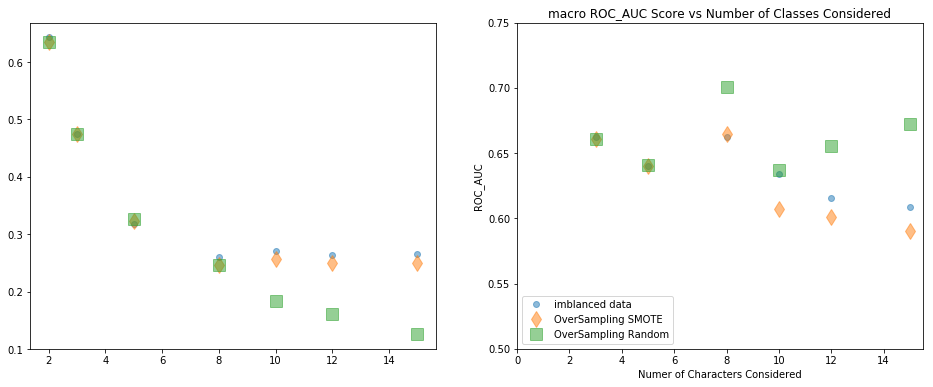

In [14]:
# Compare modeling results before and after applying sampling techniques 
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)


plt.plot(number_characters_to_consider,accuracy_per_characters_im,marker = '.' , markersize =12, linestyle = 'none', label = 'imblanced data',alpha =0.5)
plt.plot(number_characters_to_consider,Over_SM_Acc,marker = 'd', markersize =12, linestyle = 'none', label = 'OverSampling SMOTE',alpha =0.5)
plt.plot(number_characters_to_consider, Over_Random_Acc,marker = 's', markersize =12, linestyle = 'none', label = 'OverSampling Random',alpha =0.5)

plt.subplot(1, 2, 2)
#plt.plot(number_characters_to_consider, accuracy_per_characters_im)
plt.plot(number_characters_to_consider[1:], roc_per_characters_im,marker = '.', markersize =12, linestyle = 'none', label = 'imblanced data',alpha =0.5)
plt.plot(number_characters_to_consider[1:], Over_SM_ROC,marker = 'd' , markersize =12, linestyle = 'none', label = 'OverSampling SMOTE', alpha =0.5)
plt.plot(number_characters_to_consider[1:], Over_Random_ROC,marker = 's', markersize =12, linestyle = 'none', label = 'OverSampling Random',alpha =0.5)

plt.title('macro ROC_AUC Score vs Number of Classes Considered')
plt.xlabel('Numer of Characters Considered')
plt.ylabel('ROC_AUC')
plt.xlim([0,15.5])
plt.ylim([0.5,0.75])
plt.legend()
plt.legend(loc ='lower left')

# Effect of UnderSampling

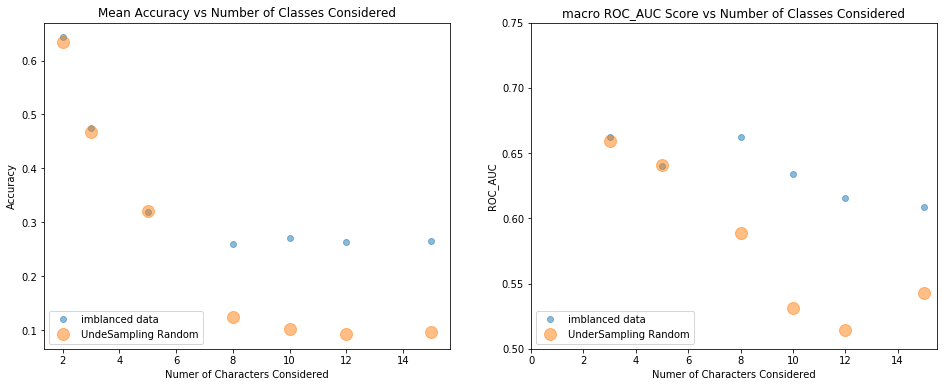

In [15]:
# Compare modeling results before and after applying sampling techniques 
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)

plt.plot(number_characters_to_consider,accuracy_per_characters_im,marker = '.' , markersize =12, linestyle = 'none', label = 'imblanced data',alpha =0.5)
plt.plot(number_characters_to_consider, Under_Random_Acc,marker = 'o', markersize =12, linestyle = 'none', label = 'UndeSampling Random',alpha =0.5) 
plt.xlabel('Numer of Characters Considered')
plt.ylabel('Accuracy')
plt.legend(loc ='lower left')
plt.title('Mean Accuracy vs Number of Classes Considered')


plt.subplot(1, 2, 2)
#plt.plot(number_characters_to_consider, accuracy_per_characters_im)
plt.plot(number_characters_to_consider[1:], roc_per_characters_im,marker = '.', markersize =12, linestyle = 'none', label = 'imblanced data',alpha =0.5)
plt.plot(number_characters_to_consider[1:], Under_Random_ROC,marker = 'o', markersize =12, linestyle = 'none', label = 'UnderSampling Random',alpha =0.5) 
plt.title('macro ROC_AUC Score vs Number of Classes Considered')
plt.xlabel('Numer of Characters Considered')
plt.ylabel('ROC_AUC')
plt.xlim([0,15.5])
plt.ylim([0.5,0.75])
plt.legend()
plt.legend(loc ='lower left')
